In [1]:
# append parent to path to allow imports
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [2]:
from src.face import FaceDetector
from src.mask import MaskHandler
from src.superpixels import SuperpixelFeatureExtractor
from src.projectUtils import Utils
from src.region import FeatureDivergence

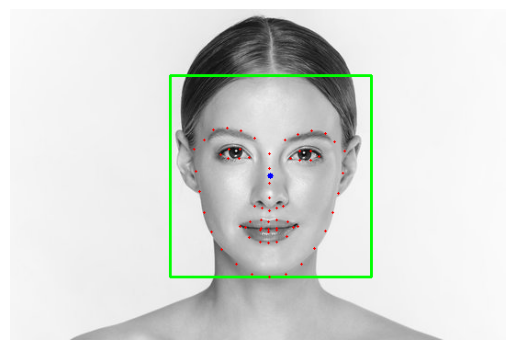

In [3]:
# %% Test FaceDetector
# Test FaceDetector with a sample image
img_path = "test_images/face.jpg"

# Instantiate the FaceDetector
face_detector = FaceDetector()

# Detect faces and landmarks in the image
img_rgb, face_rectangles, face_centers, landmarks_all_faces = face_detector.detect(
    img_path
)

# Display the detected faces and landmarks
Utils.display(img_rgb)

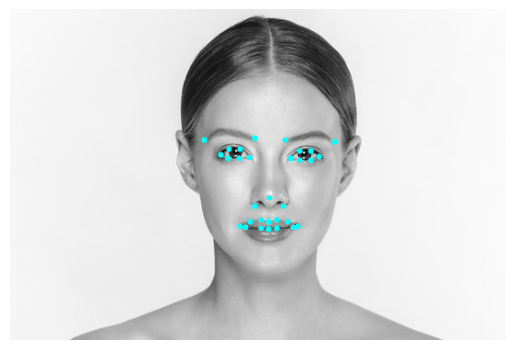

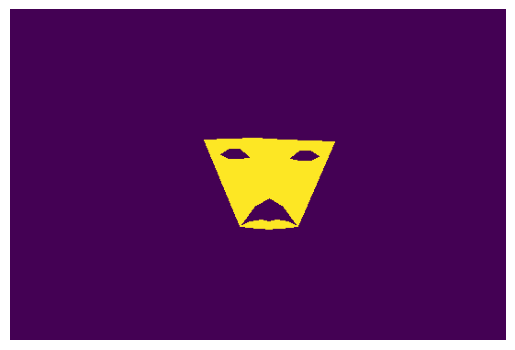

In [4]:
# %% Test MaskHandler
# Test MaskHandler with the detected landmarks
mask_handler = MaskHandler()

# Mask the points in the image using the landmarks from the FaceDetector
masked_img, selected_pts = mask_handler.get_mask_points(img_path, landmarks_all_faces)

# Display the result after masking the points
Utils.display(masked_img)

# Build the mask and display it
masks, masked_imgs = mask_handler.build_masks(img_path, selected_pts)
Utils.display(masks[0])

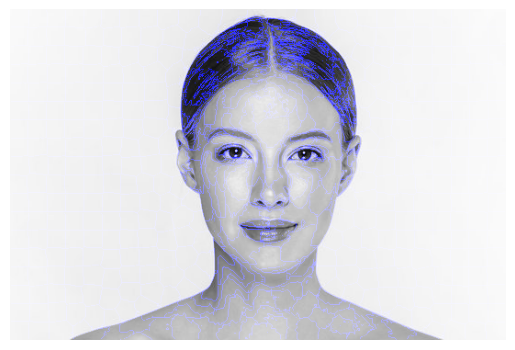

Superpixel Features: [{'label': 0, 'mean_intensity': 249.01923076923077, 'std_intensity': 0.3094899411429054, 'entropy': 0.1995776590439317}, {'label': 1, 'mean_intensity': 247.890243902439, 'std_intensity': 0.5366130813241377, 'entropy': 0.5129995764513827}, {'label': 2, 'mean_intensity': 247.05037783375315, 'std_intensity': 0.4626951037182901, 'entropy': 0.4406528881730701}, {'label': 3, 'mean_intensity': 246.06451612903226, 'std_intensity': 0.5464130284232552, 'entropy': 0.43857408383307867}, {'label': 4, 'mean_intensity': 244.9079283887468, 'std_intensity': 0.5174337176497401, 'entropy': 0.4150191380431606}, {'label': 5, 'mean_intensity': 242.9307875894988, 'std_intensity': 0.5633873856325623, 'entropy': 0.47357595828951515}, {'label': 6, 'mean_intensity': 241.46555819477436, 'std_intensity': 0.4988123515439429, 'entropy': 0.20843095381550236}, {'label': 7, 'mean_intensity': 240.8354114713217, 'std_intensity': 0.5071487878675163, 'entropy': 0.473023516594541}, {'label': 8, 'mean_in

In [5]:
# %% Test SuperpixelFeatureExtractor
# Test SuperpixelFeatureExtractor with the test image
img_path = "test_images/face.jpg"  # Replace with the actual image path
superpixel_extractor = SuperpixelFeatureExtractor(region_size=20, neighborhood_size=3)

# Get SLIC superpixels
slic, contoured_img, labels, num_superpixels = (
    superpixel_extractor.get_slic_superpixels(img_path)
)

# Display the superpixels contours on the image
Utils.display(contoured_img)

# Extract basic features for each superpixel
features = superpixel_extractor.basic_superpixel_features(img_path, slic)

# Show extracted features for each superpixel
print("Superpixel Features:", features)

# Extract Local Binary Patterns and Lacunarity features
lbp_features = superpixel_extractor.extract_local_binary_patterns(img_path, slic)

# Show LBP and Lacunarity features for each superpixel
print(
    "Local Binary Patterns and Lacunarity Features:",
    len(lbp_features[0]["lacunarity_vector"]),
)

In [6]:
print(len(features))
print(features)

len(lbp_features)
# print(lbp_features)
# print(len(lbp_features[0]['lacunarity_vector']))

# print(lbp_features[0]['lacunarity_vector'])

486
[{'label': 0, 'mean_intensity': 249.01923076923077, 'std_intensity': 0.3094899411429054, 'entropy': 0.1995776590439317}, {'label': 1, 'mean_intensity': 247.890243902439, 'std_intensity': 0.5366130813241377, 'entropy': 0.5129995764513827}, {'label': 2, 'mean_intensity': 247.05037783375315, 'std_intensity': 0.4626951037182901, 'entropy': 0.4406528881730701}, {'label': 3, 'mean_intensity': 246.06451612903226, 'std_intensity': 0.5464130284232552, 'entropy': 0.43857408383307867}, {'label': 4, 'mean_intensity': 244.9079283887468, 'std_intensity': 0.5174337176497401, 'entropy': 0.4150191380431606}, {'label': 5, 'mean_intensity': 242.9307875894988, 'std_intensity': 0.5633873856325623, 'entropy': 0.47357595828951515}, {'label': 6, 'mean_intensity': 241.46555819477436, 'std_intensity': 0.4988123515439429, 'entropy': 0.20843095381550236}, {'label': 7, 'mean_intensity': 240.8354114713217, 'std_intensity': 0.5071487878675163, 'entropy': 0.473023516594541}, {'label': 8, 'mean_intensity': 239.189

486

In [7]:
all_features = superpixel_extractor.extract_all_features(img_path, slic)

In [8]:
print(len(all_features))
print(all_features[0].keys())

for key in all_features[0].keys():
    print(key, type(all_features[0].get(key)))

486
dict_keys(['label', 'mean_intensity', 'std_intensity', 'entropy', 'lacunarity_vector'])
label <class 'int'>
mean_intensity <class 'float'>
std_intensity <class 'float'>
entropy <class 'float'>
lacunarity_vector <class 'numpy.ndarray'>


In [10]:
fv1 = all_features[0]
fv2 = all_features[2]

FeatureDivergence.get_divergence(fv1, fv2)

{'mean_intensity': 1.9688529354776279,
 'std_intensity': 0.1532051625753847,
 'entropy': 0.24107522912913837,
 'lacunarity_vector': np.float64(0.18450216425298668)}